### Computational Guided Inquiry for PChem (Neshyba, 2022)

# Work and Heat

## Introduction

The 1st law, written in differential form, looks like

$$
dU = dq + dw \ \ \ \ (1)
$$


The differential equation of state for $U$ in a temperature-volume state space is given by

$$ 
dU = C_V dT + \pi_T dV \ \ \ (2)
$$

If you combine these two equations and apply it a process in which no work is done, you get a way to calculate $dq$ from changes in $T$. That can be very handy!   

Moving on to PV work, for a modest (well, infintessimal) change in volume, the work can be calculated from the change in volume using

$$
dw = -P_{ex}dV \ \ \ \ (3)
$$

But of course, you need to know what the external pressure is to do this. 

Moving on to bigger expansions or compressions of an ideal gas, the PV *work* associated with an isothermal process is given by

$$
w = -n R T ln\bigl ({V_2 \over V_1} \bigr ) \ \ \ \ (4)  
$$

while the *heating* associated with this (still assuming an ideal gas) is given by 

$$
q = +n R T ln\bigl ({V_2 \over V_1}\bigr) \ \ \ \ (5)
$$

For an *adiabatic* expansion of an ideal gas, the fractional change in temperature can be got from the fractional change in volume according to

$$ 
{\Delta T \over T} \approx -{n R \over C_V} {\Delta V \over V} \ \ \ \ (6)
$$

as long as these fractional changes are not too great (say, less than 20%, so ${\Delta V \over V}<0.2$). For bigger changes, it's better to use the approximation

$$
T_2 \approx T_1 \times \bigl ({V_2 \over V_1} \bigr ) ^ {-{nR \over C_V}} \ \ \ \ (7)
$$

$$
P_2 \approx P_1 \times \bigl ({V_2 \over V_1} \bigr ) ^ {-{nR \over C_V} -1} \ \ \ \ (8)
$$

where, strictly speaking, one has to assume that the heat capacities don't change much for these equations to be valid.


## Learning Goals
1. Carry out calculations associated with various manipulations of ideal gases (expansions, contractions, isochoric, isothermal, adiabatic).
1. Create functions in Python, and verify they are correct.

In [21]:
# Import resources
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [22]:
%matplotlib notebook

In [23]:
R = AssignQuantity(8.314,'J/mol/K'); print(R)
n = AssignQuantity(1,'mol'); print(n)

8.314 joule / kelvin / mole
1 mole


### Temperature increase when you heat up an ideal gas
Find the temperature increase in one mole of a monatomic ideal gas when you add 100 J to it, all the while (perhaps unwisely) keeping the gas confined to a constant volume. Equations (1) and (2) will help, as will the following considerations:

- There can't be any work done if the volume is held constant
- $\pi_T=0$ for an ideal gas
- $C_V$ is constant (${3 \over 2}nR$) for a monatomic ideal gas

In [24]:
### BEGIN SOLUTION
C_V = 3/2*R*n; print(C_V)
q = AssignQuantity(100,'J');print(q)
delta_T = q/C_V; print(delta_T)
### END SOLUTION

12.471 joule / kelvin
100 joule
8.018603159329645 kelvin


### Finding the heat and work of a multi-step isothermal expansion of an ideal gas when you know the volumes and temperature
When one mole of an ideal diatomic gas in the classical limit is expanded from 10 L to 20 L, at 298 K, find the work and the heat. Eqs. (4-5) should help here. Don't forget that in numpy, "np.log" is the natural log.

In [25]:
### BEGIN SOLUTION
T = AssignQuantity(298,'K')
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')
w = -n*R*T*np.log(V2/V1); print(w)
q = -w; print(q)
### END SOLUTION

-1717.3220464342648 joule
1717.3220464342648 joule


### Finding the new volume of a gas after it has undergone isothermal expansion of known heat & work
Suppose one mole an ideal diatomic gas is expanded isothermally at 298 K, starting at 20 L. Assuming this process absorbed 500 J of heat (which means it did 500 J of work on the surroundings), find the final volume. Eq. (4) should help here, although you'll have to solve it for the final volume. Oh, and don't forget that numpy's version of $e^x$ is np.exp(x). 

In [26]:
### BEGIN SOLUTION
q = AssignQuantity(500,'J'); print(q)
T = AssignQuantity(298,'K'); print(T)
V2_over_V1 = np.exp(q/(n*R*T)); print(V2_over_V1)
V1 = AssignQuantity(20,'L'); print(V1)
V2 = V1*V2_over_V1; print(V2)
### END SOLUTION

500 joule
298 kelvin
1.2236160891038332 dimensionless
20 liter
24.472321782076666 liter


### % changes in temperature from % changes in volume during adiabatic expansion or compression 
When one mole of an ideal monatomic gas is expanded adiabatically from 10 L, up 2 L to 12 L, starting at 298 K, what % reduction in temperature will it experience? Eq. (6) will help, if you think of this as a 20% expansion, so ${\Delta V \over V}={2 \over 10}$. 

In [27]:
### BEGIN SOLUTION
dV_over_V = 2/10
C_V = 3/2*R*n
dT_over_T = -n*R/C_V * dV_over_V; print(dT_over_T*100)
### END SOLUTION

-13.333333333333334 dimensionless


### Changes in temperature from in a multi-step adiabatic expansion 
When one mole an ideal monatomic gas is expanded adiabatically from 20 L to 40 L, starting at 298 K, what's the final temperature? Eq. (6) is not valid in this case because this increase in volume is much bigger than 20% -- so you'll have to resort to the much more accurate Eq. (7).

In [28]:
### BEGIN SOLUTION
C_V = 3/2*R*n
nR_over_C_V = n*R/C_V
V2_over_V1 = 40/20
T2_over_T1 = (V2_over_V1)**(-nR_over_C_V);print(T2_over_T1)
T1 = AssignQuantity(298,'K')
T2 = T1*T2_over_T1; print(T2)
### END SOLUTION

0.6299605249474366
187.7282364343361 kelvin


### Functions
Functions in Python are really handy ways to do similar tasks multiple times. You may have already noticed them in our code: we've used one that calculates state spaces ("StateSpace"), and others that calculate partial derivatives ("dF_dx" and "dF_dy"). 

Another example is given below. This function calculates a Boyle isotherm. Its job is to return an array of volumes from V1 to V2 (you get to specify those limits when you call this function), and another array that corresponds to the pressures at those volumes. 

Since you'll be learning how to make these functions, it's worth paying attention to some syntax issues here. Note the colon at the end of the first line, and the indentation of the rest of the lines. Also, some semantics: we call the variables in parentheses in the first line (i.e., *V1*, *V2*, *n*, *R*, and *T*) the *arguments* of the function. We call any variables that follow the word "return" in the last line (in this case, *Varray* and *Parray*) the *results* of the function.

Another way of thinking about this is, *arguments* are what go *into* a function, and *results* are what come *out*.

Execute this cell now.

In [29]:
# Defining an isothermal expansion/contraction function
def func_P_isotherm(V1,V2,n,R,T):
    Varray = np.linspace(V1,V2)
    Parray = n*R*T/Varray
    return Varray, Parray

### Pause for analysis
Nothing seemed to happen, right? But it did! Python has quietly stored that function in its memory, ready for whenever you want to use it.

We do this in the cell below. A key point to note about this is that the *names of arguments and results don't have to be the same as what's in the function definition.* In the code below, for example, the line

    V_isotherm, P_isotherm = func_P_isotherm(V1,V2,n,R,T)
    
specifies that you want the names of the returned volume and pressure arrays to be *V_isotherm* and *P_isotherm*, rather than *Varray* and *Parray*. It doesn't *hurt* to give them the same names as in the function definition, you just don't have to. 

In this example, the caller has given all the arguments the same names as the function does. Those could have been different too, it's just not necessary. 

Execute the cell below and you'll see the results displayed graphically!

<IPython.core.display.Javascript object>


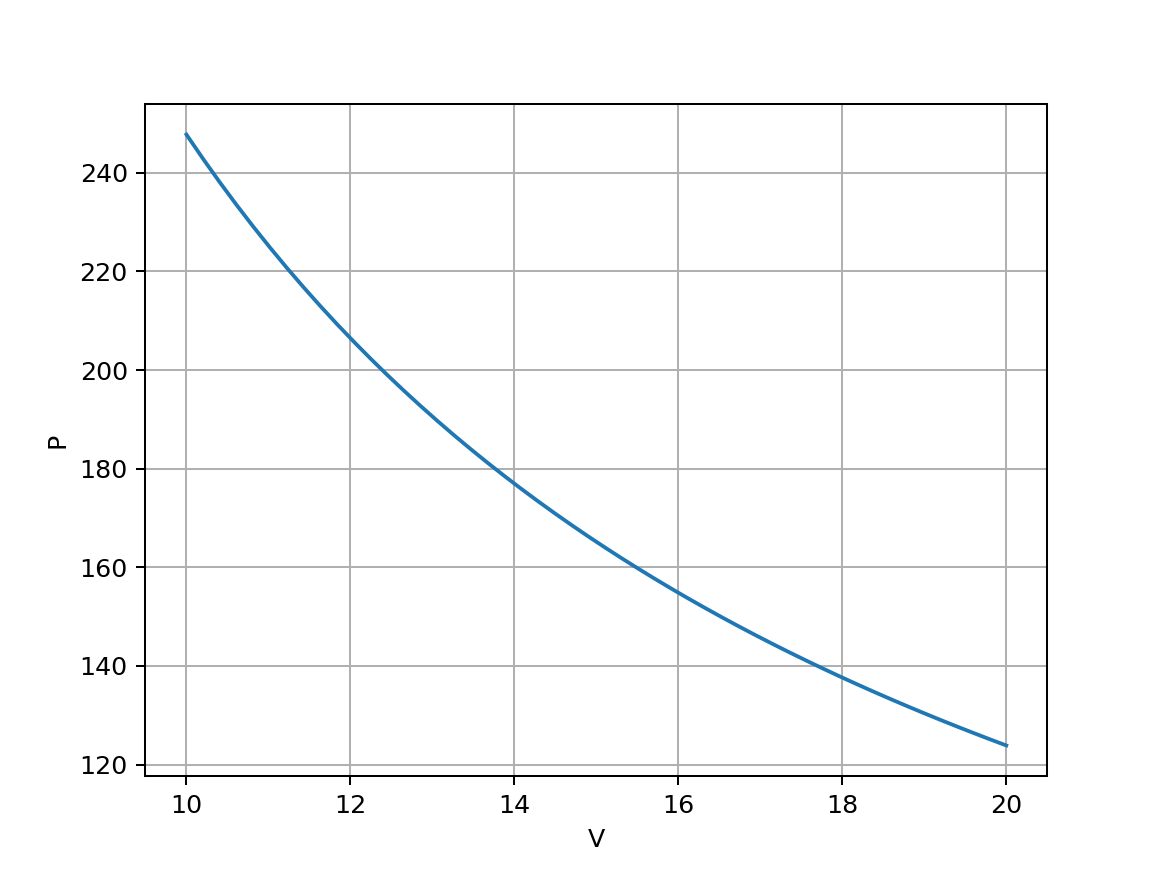

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [30]:
# Using our isothermal expansion function

# Define a temperature
T = AssignQuantity(298,'K')

# Lay out the range of volumes we want
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')

# Make call to our isotherm function
V_isotherm, P_isotherm = func_P_isotherm(V1,V2,n,R,T)

# Plot the results
plt.figure()
plt.plot(V_isotherm, P_isotherm)
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)

### Your turn
In the cell below, your challenge is to create a function called *func_P_adiabat*. This function's job is to calculate the pressure of an adiabat of a gas whose starting volume is V1, and whose starting temperature is T1; then the gas is expanded until its volume reaches V2. As it does so, its pressure and temperature both drop. 

More specifically, some notes:
- Equation (8) is the relevant relationship
- Make the *arguments* V1, V2, n, R, T1, and C_V (all of which are scalars)
- Make the *results* V2array and P2array (both of which are arrays)

In [31]:
### BEGIN SOLUTION
def func_P_adiabat(V1,V2,n,R,T1,C_V):
    V2array = np.linspace(V1,V2)
    P1 = n*R*T1/V1
    nR_over_C_V = n*R/C_V
    P2array = P1*(V2array/V1)**(-nR_over_C_V-1)
    return V2array, P2array
### END SOLUTION

### Exercising your function
Let's take *func_P_adiabat* out for a spin! We've set up the first part in the cell below; all you need to do is make the call to your *func_P_adiabat*, and graph the results.

<IPython.core.display.Javascript object>


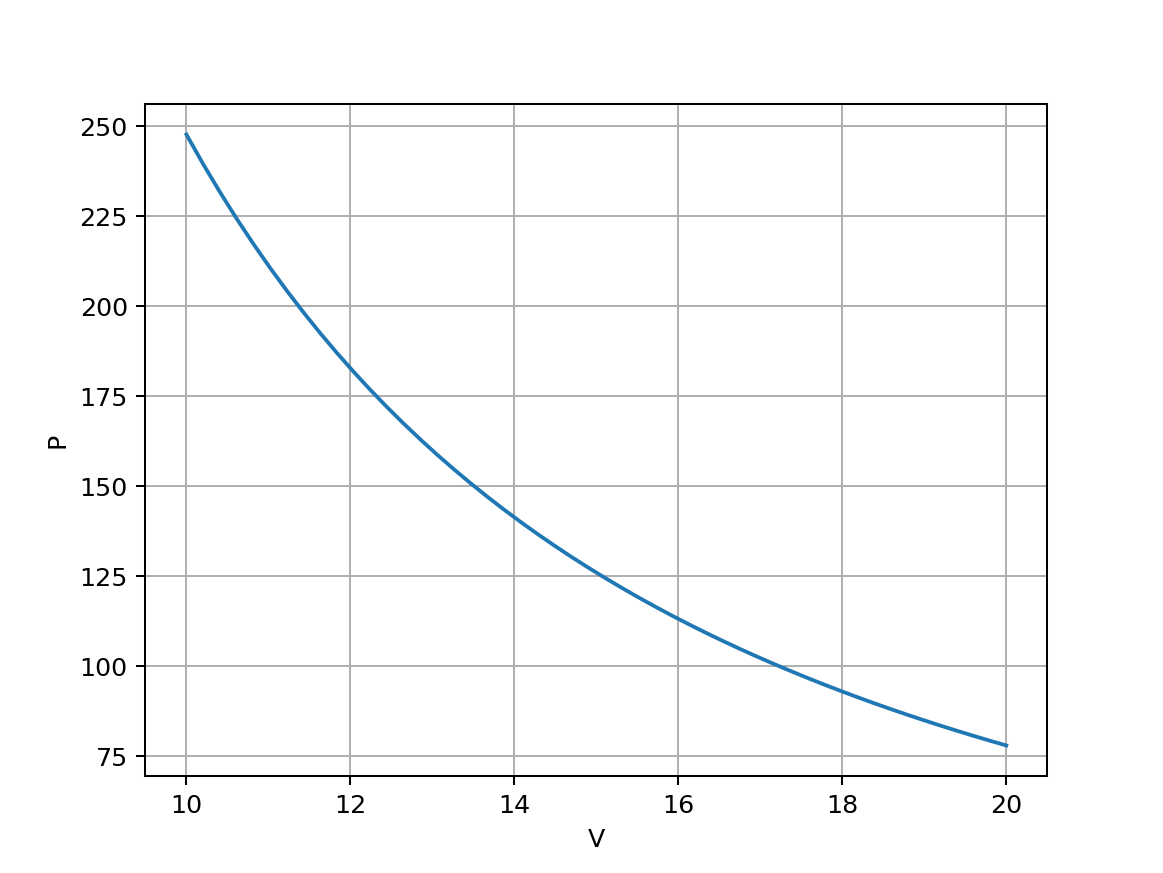

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [32]:
# Heat capacity for a monatomic ideal gas, 1 mole
C_V = 3/2*R*n

# Define the starting temperature
Tstart = AssignQuantity(298,'K')

# Lay out the range of volumes we want
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')

# Make the call to func_P_adiabat, naming the returned arrays "V_adiabat" and "P_adiabat"
### BEGIN SOLUTION
V_adiabat, P_adiabat = func_P_adiabat(V1,V2,n,R,Tstart,C_V)
### END SOLUTION

# Plot the results (P as a function of V)
### BEGIN SOLUTION
plt.figure()
plt.plot(V_adiabat, P_adiabat)
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)
### END SOLUTION

### Graphing adiabats and isotherms together
It's a bit difficult to tell, from the preceding graphs, how adiabats and isotherms differ. To do that, we need to look at them on the same graph. In the cell below, plot your adiabat ("P_adiabat") and isotherm ("P_isotherm") on the same graph, as a function of their volume arrays ("V_adiabat" and "V_isotherm"). Annotate using the label/legend method.

<IPython.core.display.Javascript object>


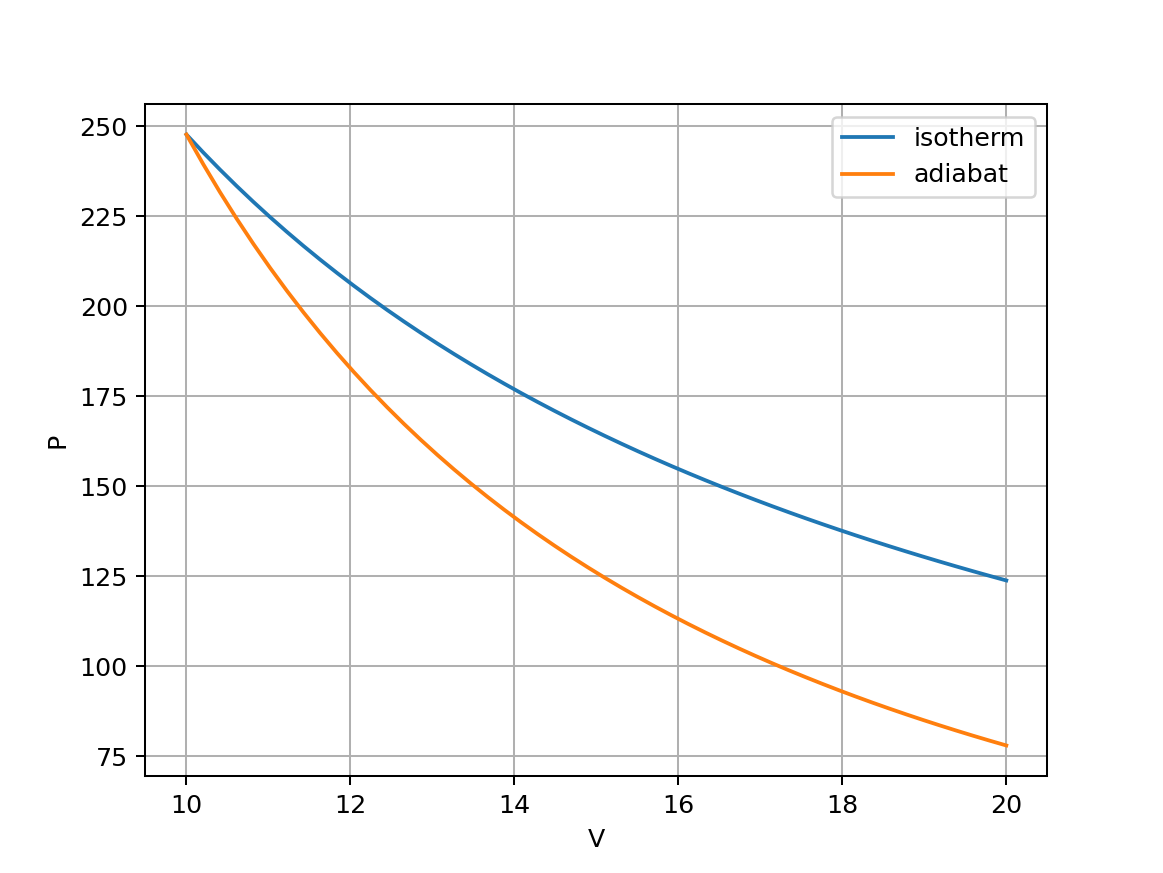

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


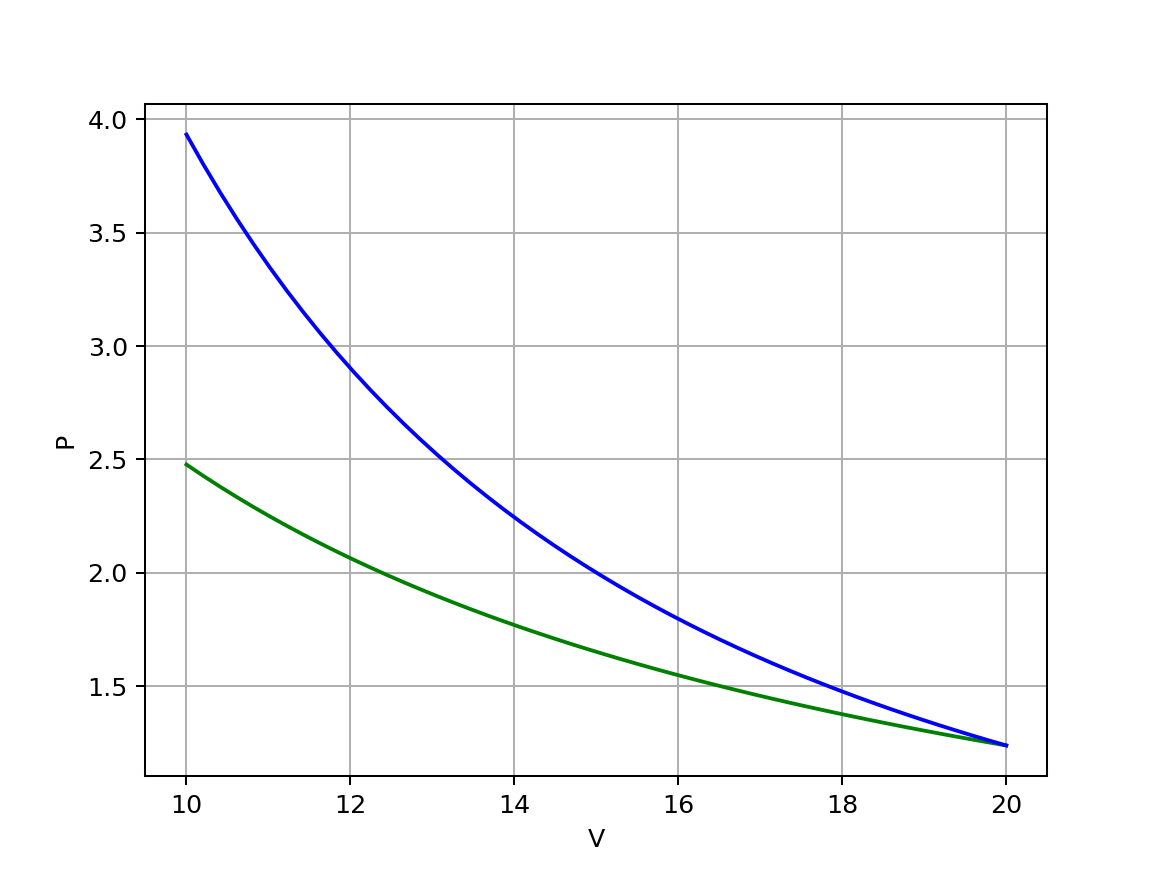

[1.2387860000000002 1.260144043590304 1.2820974202744106 1.30466918807405 1.3278835537689637 1.3517659431417557 1.3763430763312101 1.4016430487260185 1.4276954178726018 1.4545312969170139 1.4821834551523134 1.5106864262999287 1.5400766252171156 1.570392473793452 1.6016745368783394 1.6339656691697448 1.667311174093121 1.7017589758099951 1.7373598056196449 1.7741674041564957 1.8122387409423337 1.8516342530286887 1.892418104663488 1.9346584701405227 1.9784278422442416 2.0238033689900403 2.0708672216867496 2.1197069977191685 2.1704161618711484 2.223094530491893 2.2778488033591358 2.334793148723774 2.39404984774432 2.455750005351449 2.5200343355411907 2.587054030201342 2.6569717218550717 2.729962552188912 2.8062153599558224 2.8859340038514096 2.969338838305298 3.0566683628732365 3.1481810691355707 3.2441575127969453 3.3449026431538433 3.450748427388798 3.56205681343244 3.6792230826150503 3.802679652265592 3.932900399126956] bar


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [34]:
### BEGIN SOLUTION
plt.figure()
plt.plot(V_isotherm, P_isotherm, label='isotherm')
plt.plot(V_adiabat, P_adiabat, label='adiabat')
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)
plt.legend()

# # These are for exploration/exam presentations, not the assignment
# plt.figure()
# plt.plot(V_adiabat, P_adiabat, label='adiabat')
# plt.plot(V_isotherm, P_isotherm, label='isotherm')
# plt.xlabel('V')
# plt.ylabel('P')
# plt.title('Expansion of an ideal gas')
# plt.grid(True)

# V_adiabat2, P_adiabat2 = func_P_adiabat(V2,V1,n,R,Tstart,C_V)
# plt.figure()
# plt.plot(V_adiabat2, P_adiabat2, label='adiabat')
# plt.plot(V_isotherm, P_isotherm, label='isotherm')
# plt.xlabel('V')
# plt.ylabel('P')
# plt.title('Compression of an ideal gas')
# plt.grid(True)

# V_adiabat2, P_adiabat2 = func_P_adiabat(V2,V1,n,R,Tstart,C_V)
# plt.figure()
# plt.plot(V_isotherm, P_isotherm.to('bar'), label='isotherm', color='green')
# plt.plot(V_adiabat2, P_adiabat2.to('bar'), label='adiabat', color='blue')
# plt.xlabel('V')
# plt.ylabel('P')
# plt.grid(True)
# print(P_adiabat2.to('bar'))
# plt.legend()



### END SOLUTION

### Refresh/save/validate/close/submit/logout